<a href="https://colab.research.google.com/github/mixonij/DSP_labs/blob/main/DSP%2C_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1jgP-S4UXWIesFB-jS_HdfnVgDrJ8uY_1'
downloaded = drive.CreateFile({'id': file_id})

data = downloaded.GetContentString().replace("\n", "").replace('\ufeff', "")
df = pd.DataFrame([x.split(';') for x in data.split('\r')])
df = df.drop([24])
df[0][23] = '248235'
df = df.astype('int32')
print(df)

        0       1       2       3   ...      27      28      29      30
0   246522  240194  231202  240762  ...  253675  256164  235223  245886
1   230751  226797  218084  224106  ...  244512  245354  220243  239127
2   225080  218412  209342  214906  ...  228972  234234  214161  227617
3   217014  211710  204419  219883  ...  232083  225264  209980  222071
4   210617  203353  195842  214097  ...  226540  223356  210331  217015
5   217604  209182  210110  217768  ...  227461  220575  210949  221318
6   218100  226676  249215  250517  ...  263324  235025  225386  257554
7   243768  232577  284586  287202  ...  293614  257655  244592  284771
8   274684  248260  314869  313898  ...  308550  285605  259633  308726
9   287652  254153  317435  318857  ...  313853  299778  266516  321253
10  295461  263652  336809  328622  ...  322643  304800  272331  329144
11  302629  265752  341587  330879  ...  327421  321664  271277  330045
12  297696  269149  313915  316002  ...  308719  304263  272576 

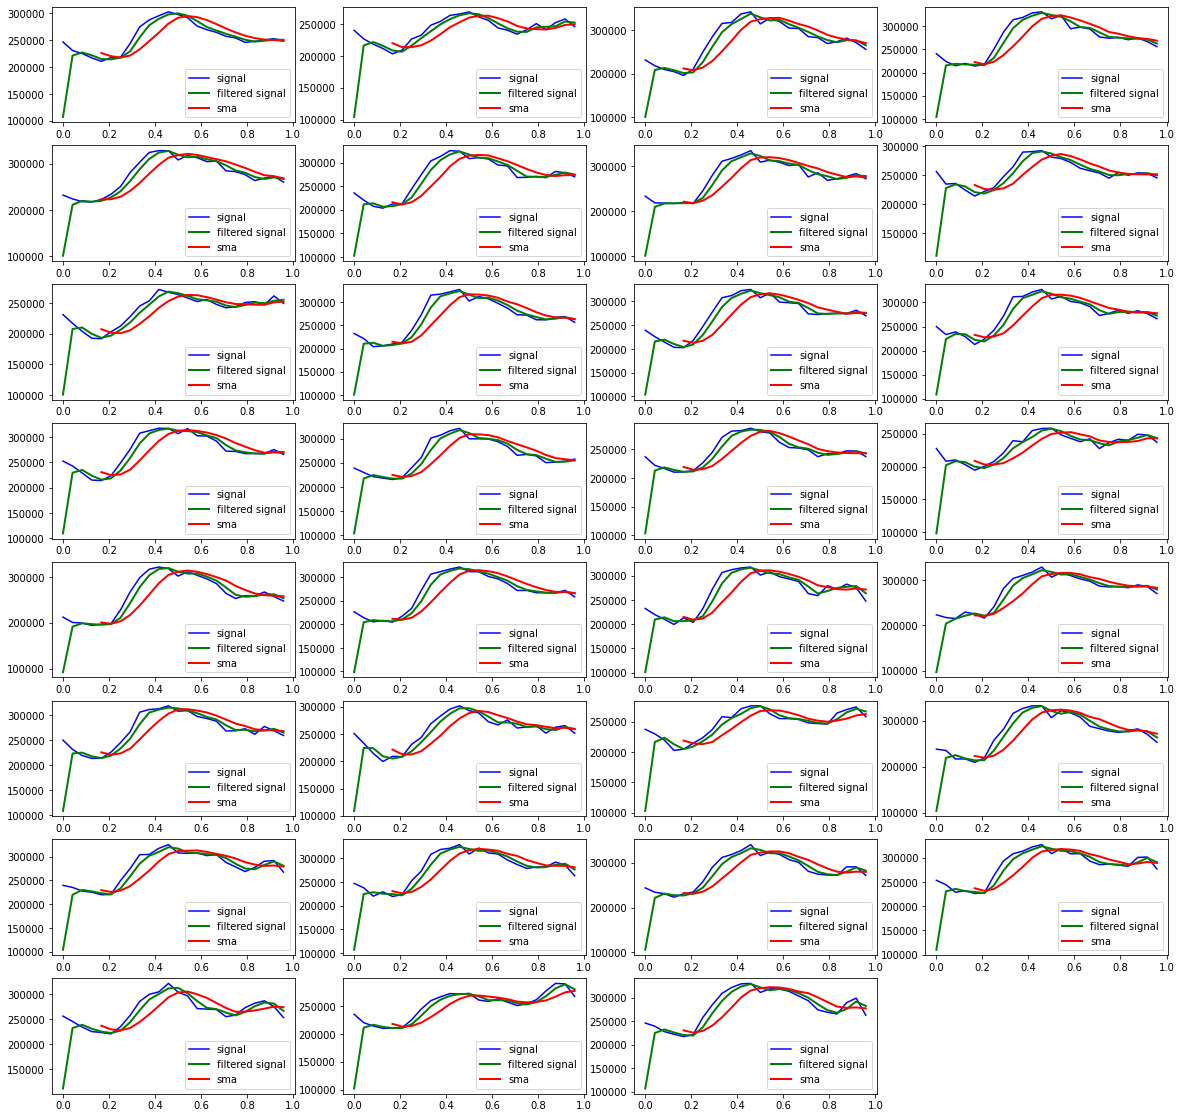

In [ ]:
import scipy
import matplotlib.pyplot as plt

order = 1
sampling_freq = 24
cutoff_freq = 5
sampling_duration = 1
number_of_samples = sampling_freq * sampling_duration
time = np.linspace(0, sampling_duration, number_of_samples, endpoint=False)

fig = plt.figure(figsize=(20, 20))

for i in range(31):
  signal = []
  buf = df[i].to_numpy().astype('int32')
  rolling = df[i].rolling(window=5).mean()
  for j in range(len(buf)):
      signal.append(buf[j])
  normalized_cutoff_freq = cutoff_freq /(0.5 * sampling_freq)
  numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq)
  filtered_signal = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, signal)

  ax = fig.add_subplot(8,4,i+1)
  ax.plot(time, signal, 'b-', label='signal')
  ax.plot(time, filtered_signal, 'g-', linewidth=2, label='filtered signal')
  ax.plot(time, rolling, 'r-', linewidth=2, label='sma')
  ax.legend()

fig.show()

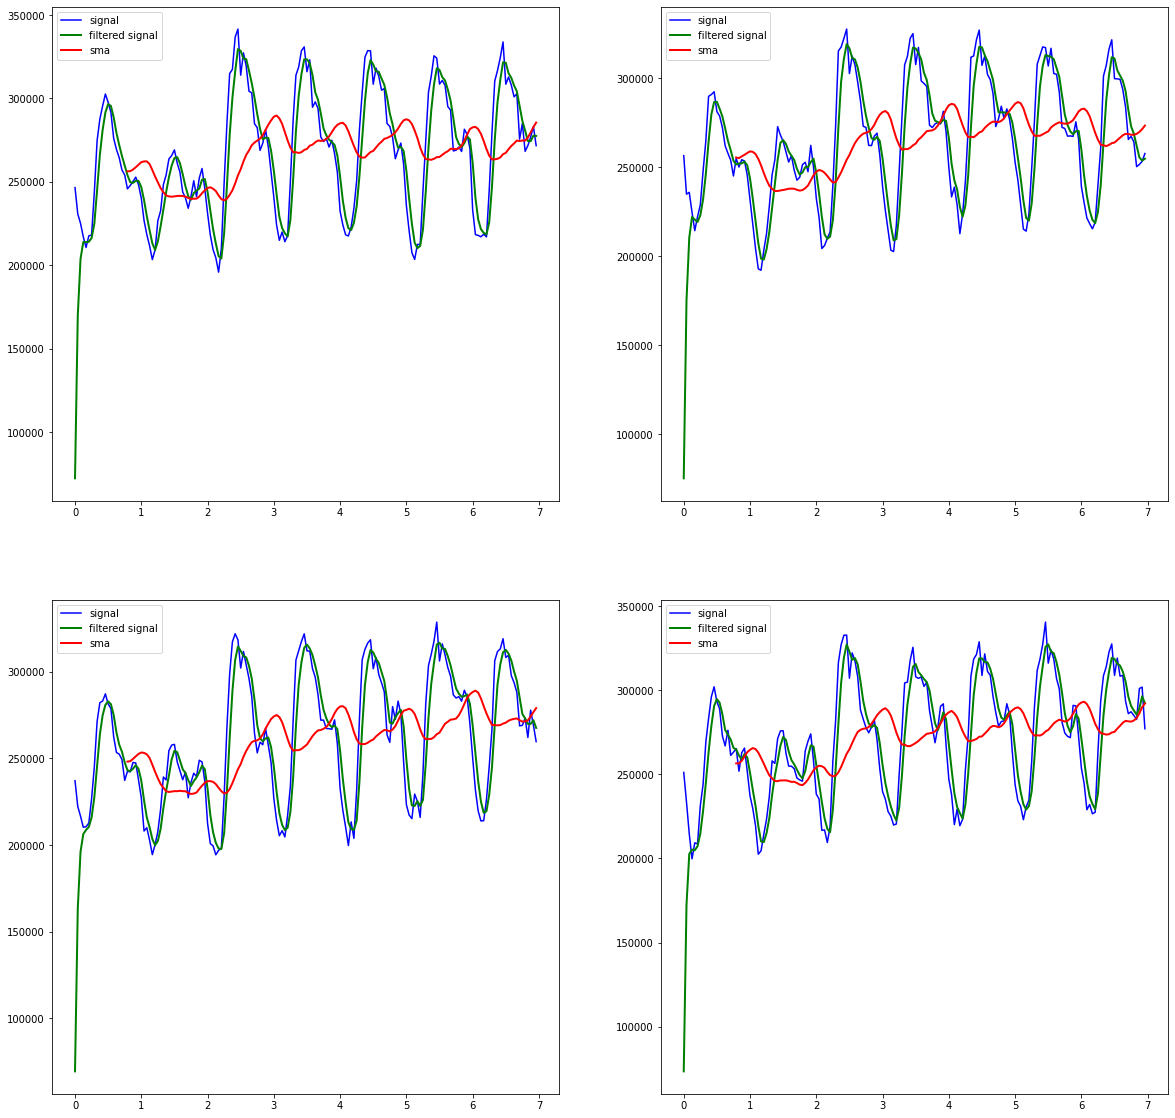

In [ ]:
order = 1
sampling_freq = 24
cutoff_freq = 3
sampling_duration = 7
number_of_samples = sampling_freq * sampling_duration
time = np.linspace(0, sampling_duration, number_of_samples, endpoint=False)

fig = plt.figure(figsize=(20, 20))

for w in range(4):
  signal = []
  sma_df = pd.DataFrame(columns=['A'])
  for i in range(7):
    buf = df[i + w*7].to_numpy().astype('int32')
    for j in range(len(buf)):
      signal.append(buf[j])
      sma_df = sma_df.append({'A': buf[j]}, ignore_index=True)
  rolling = sma_df.rolling(window=20).mean()
  normalized_cutoff_freq = cutoff_freq / (0.5 * sampling_freq)
  numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq)
  filtered_signal = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, signal)

  ax = fig.add_subplot(2,2,w+1)
  ax.plot(time, signal, 'b-', label='signal')
  ax.plot(time, filtered_signal, 'g-', linewidth=2, label='filtered signal')
  ax.plot(time, rolling, 'r-', linewidth=2, label='sma')
  ax.legend()

fig.show()

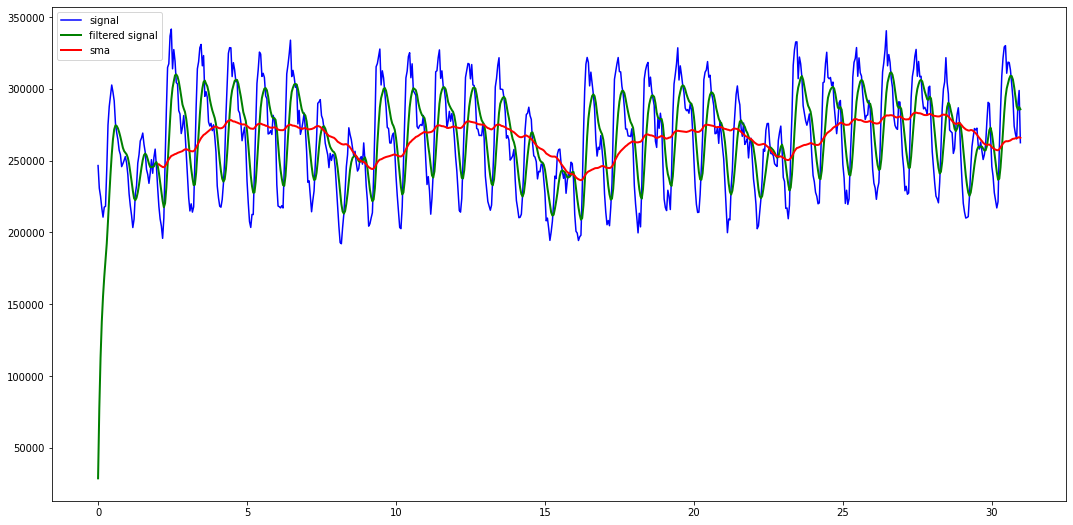

In [ ]:
order = 1
sampling_freq = 24
cutoff_freq = 1
sampling_duration = 31
number_of_samples = sampling_freq * sampling_duration
time = np.linspace(0, sampling_duration, number_of_samples, endpoint=False)

fig = plt.figure(figsize=(40, 20))

signal = []
sma_df = pd.DataFrame(columns=['A'])
for i in range(31):
  buf = df[i].to_numpy().astype('int32')
  for j in range(len(buf)):
    signal.append(buf[j])
    sma_df = sma_df.append({'A': buf[j]}, ignore_index=True)
rolling = sma_df.rolling(window=50).mean()
normalized_cutoff_freq = cutoff_freq / (0.5 * sampling_freq)
numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq)
filtered_signal = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, signal)

ax = fig.add_subplot(2,2,w+1)
ax.plot(time, signal, 'b-', label='signal')
ax.plot(time, filtered_signal, 'g-', linewidth=2, label='filtered signal')
ax.plot(time, rolling, 'r-', linewidth=2, label='sma')
ax.legend()

fig.show()